In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import seaborn as sns

def load_data():
  (X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
  return (X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist)

def make_mnist(data, labels, images_per_class):
    new_data = []
    new_labels = []
    for class_label in range(10):
        mask = labels == class_label
        filtered_data = data[mask][:images_per_class]
        filtered_labels = np.full(len(filtered_data), class_label)  # Create label array of correct size

        new_data.append(filtered_data)
        new_labels.append(filtered_labels)

    # Stack and concatenate to form the new dataset and labels
    new_data = np.vstack(new_data)
    new_labels = np.concatenate(new_labels)

    return new_data, new_labels

def model_mnist():
  (X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = load_data()
  (X_train, y_train) = make_mnist(X_train_mnist, y_train_mnist, 3000)
  (X_test_mnist, y_test_mnist) = make_mnist(X_test_mnist, y_test_mnist, 1000)
  return (X_train, y_train), (X_test_mnist, y_test_mnist)

def normalize(image):
  img_norm_0_to_1 = tf.cast(image, tf.float32) / 255
  return img_norm_0_to_1

def plotting(history):
    history = history.history
    history_df = pd.DataFrame(history)

    # Add an 'epoch' column starting from 1 up to the length of the DataFrame
    history_df['epoch'] = range(1, len(history_df) + 1)

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=history_df, x='epoch', y='val_accuracy', label='Validation Accuracy')
    sns.lineplot(data=history_df, x='epoch', y='accuracy', label='Training Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


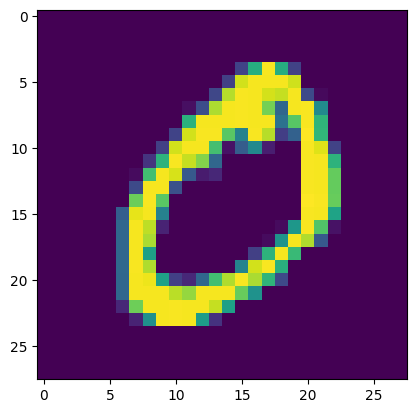

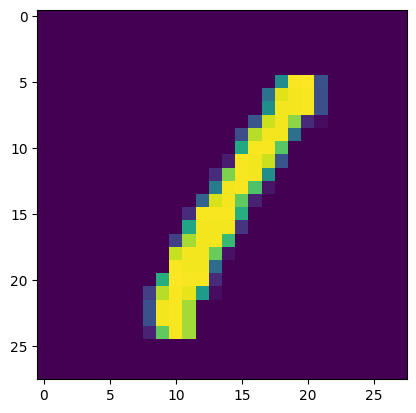

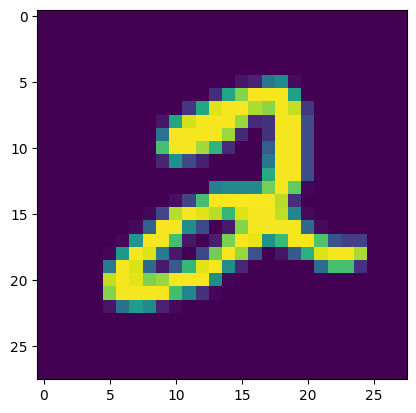

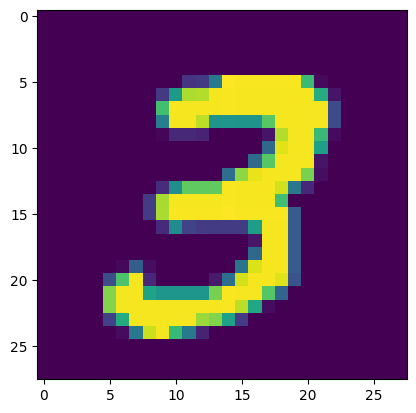

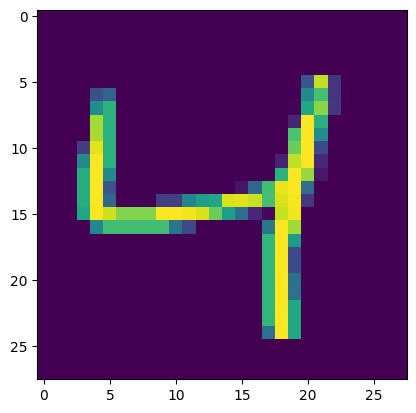

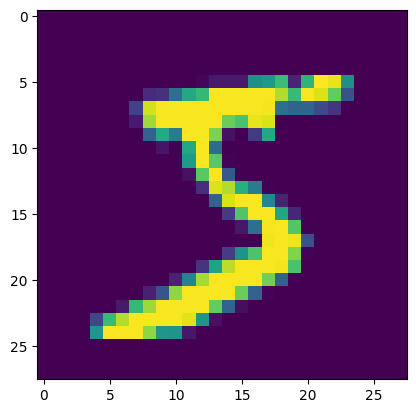

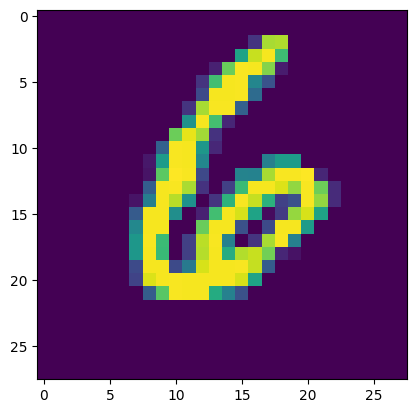

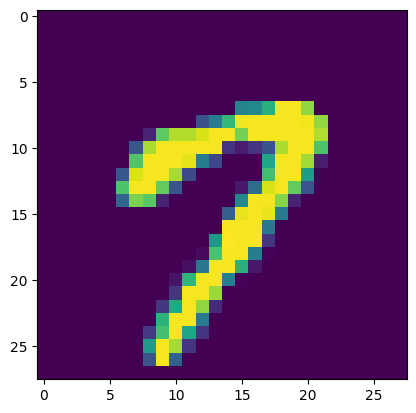

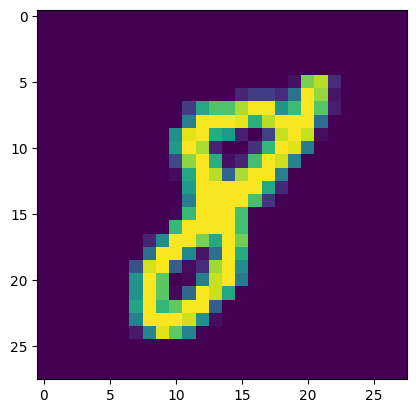

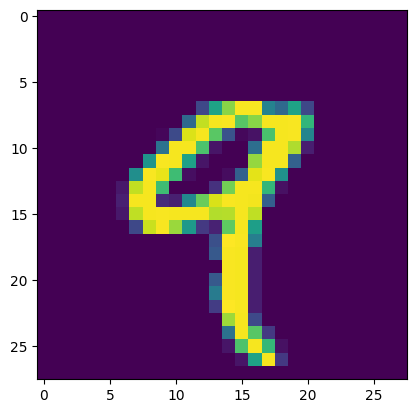

In [ ]:
# Import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Get the dataset
(X_train, y_train), (X_test, y_test) = model_mnist()

# Look at each image
for i in range(10):
  plt.imshow(X_train[i * 3000])
  plt.show()


In [ ]:
# Print the shape
print(X_train.shape)
print(y_train_onehot.shape)

(30000, 28, 28)
(30000, 10)


In [ ]:
# Create the Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

model = Sequential()

model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(units = 392, activation = "relu"))
model.add(Dense(units = 196, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))


from tensorflow.keras.utils import to_categorical

X_train = normalize(X_train)
X_test = normalize(X_test)

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





In [ ]:
history = model.fit(X_train, y_train_onehot, epochs=20, validation_data=(X_test, y_test_onehot))


Epoch 1/20
938/938 [==============================] - 8s 7ms/step - loss: 0.2556 - accuracy: 0.9225 - val_loss: 0.1421 - val_accuracy: 0.9555
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0992 - accuracy: 0.9689 - val_loss: 0.1081 - val_accuracy: 0.9640
Epoch 3/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0637 - accuracy: 0.9793 - val_loss: 0.0969 - val_accuracy: 0.9697
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0441 - accuracy: 0.9853 - val_loss: 0.1156 - val_accuracy: 0.9668
Epoch 5/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0344 - accuracy: 0.9883 - val_loss: 0.1057 - val_accuracy: 0.9724
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0852 - val_accuracy: 0.9764
Epoch 7/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0267 - accuracy: 0.9906 - val_loss: 0.0931 - val_accuracy: 0.9760
Epoch 

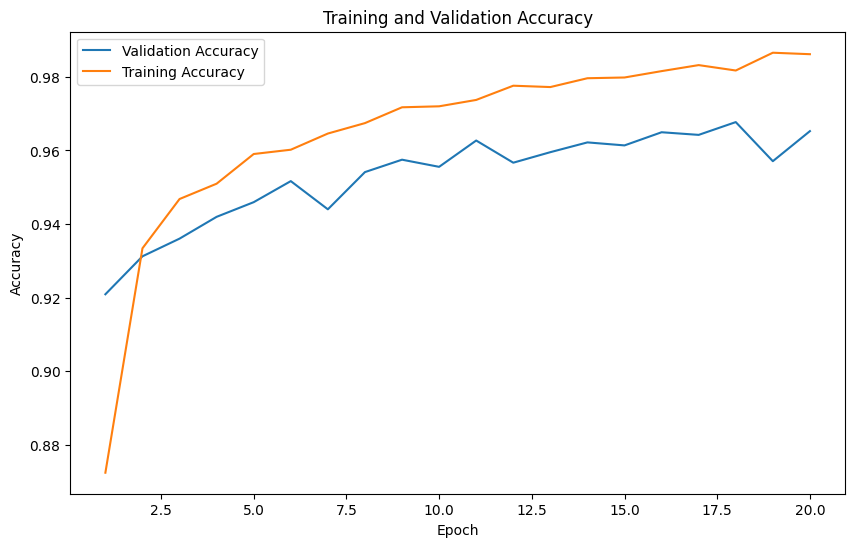

In [ ]:
# Plot the accuracy
plotting(history)

In [ ]:
# Predict the numbers
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load the image file
img = load_img('/content/sample_data/sample_image.webp', color_mode='grayscale', target_size=(28, 28))

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")

1/1 [==============================] - 0s 61ms/step
Predicted class: 7


In [ ]:
img = load_img('/content/sample_data/1.webp', color_mode='grayscale', target_size=(28, 28))

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")

1/1 [==============================] - 0s 21ms/step
Predicted class: 1
